<a href="https://colab.research.google.com/github/Tianea2160/EmotionRecognition/blob/master/%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 4.9 MB/s 
     |████████████████████████████████| 448 kB 50.8 MB/s 


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,692 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 8.23 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-03-08 06:01:31--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=keccFt

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

plt.rc('font', family='Malgun Gothic')
train_df = pd.read_excel('/content/sentiment_analysis.xlsx')
train_df.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,NaN,NaN
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,NaN,NaN
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,NaN,NaN


In [5]:
train_df.shape

(74856, 14)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74856 entries, 0 to 74855
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      74856 non-null  int64 
 1   value   74856 non-null  int64 
 2   연령      74856 non-null  object
 3   성별      74856 non-null  object
 4   상황키워드   74856 non-null  object
 5   신체질환    74856 non-null  object
 6   감정_대분류  74856 non-null  object
 7   감정_소분류  74856 non-null  object
 8   사람문장1   74856 non-null  object
 9   시스템응답1  74856 non-null  object
 10  사람문장2   74856 non-null  object
 11  시스템응답2  74855 non-null  object
 12  사람문장3   49660 non-null  object
 13  시스템응답3  49654 non-null  object
dtypes: int64(2), object(12)
memory usage: 8.0+ MB


In [7]:
train_df.fillna('', inplace = True)

In [8]:
train_df['감정_대분류'].value_counts()

상처    13505
슬픔    12708
분노    12503
기쁨    12449
불안    12383
당황    11308
Name: 감정_대분류, dtype: int64

In [9]:
sentimential_list = {'행복' : 0, '기쁨': 0, '분노' : 1, '불안' : 1, '당황' : 1, '슬픔' : 2, '상처' : 2}
train_df['label'] = train_df['감정_대분류'].map(sentimential_list)
train_df.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,label
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.,0
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,,,0
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,,,1
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.,2
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,,,2


In [10]:
train_df[(train_df['사람문장3'] == '') | (train_df['시스템응답3'] == '')]['label'].value_counts()

1    12054
2     8979
0     4174
Name: label, dtype: int64

In [11]:
train_df['label'].value_counts()

1    36194
2    26213
0    12449
Name: label, dtype: int64

In [12]:
train_df.isnull().sum()

번호        0
value     0
연령        0
성별        0
상황키워드     0
신체질환      0
감정_대분류    0
감정_소분류    0
사람문장1     0
시스템응답1    0
사람문장2     0
시스템응답2    0
사람문장3     0
시스템응답3    0
label     0
dtype: int64

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74856 entries, 0 to 74855
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      74856 non-null  int64 
 1   value   74856 non-null  int64 
 2   연령      74856 non-null  object
 3   성별      74856 non-null  object
 4   상황키워드   74856 non-null  object
 5   신체질환    74856 non-null  object
 6   감정_대분류  74856 non-null  object
 7   감정_소분류  74856 non-null  object
 8   사람문장1   74856 non-null  object
 9   시스템응답1  74856 non-null  object
 10  사람문장2   74856 non-null  object
 11  시스템응답2  74856 non-null  object
 12  사람문장3   74856 non-null  object
 13  시스템응답3  74856 non-null  object
 14  label   74856 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 8.6+ MB


리뷰의 최대 길이 :  155
리뷰의 최소 길이 :  1
리뷰 :  ['헉']
리뷰의 평균 :  32.00404777172171


(array([3.300e+01, 1.640e+02, 1.238e+03, 3.172e+03, 4.312e+03, 5.373e+03,
        5.920e+03, 6.352e+03, 6.475e+03, 6.334e+03, 5.941e+03, 5.615e+03,
        6.728e+03, 4.279e+03, 3.709e+03, 2.936e+03, 1.830e+03, 1.281e+03,
        8.040e+02, 5.590e+02, 4.450e+02, 3.070e+02, 2.280e+02, 1.590e+02,
        1.480e+02, 1.420e+02, 7.500e+01, 6.700e+01, 6.500e+01, 4.100e+01,
        5.200e+01, 4.300e+01, 1.100e+01, 1.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   4.08,   7.16,  10.24,  13.32,  16.4 ,  19.48,  22.56,
         25.64,  28.72,  31.8 ,  34.88,  37.96,  41.04,  44.12,  47.2 ,
         50.28,  53.36,  56.44,  59.52,  62.6 ,  65.68,  68.76,  71.84,
         74.92,  78.  ,  81.08,  84.16,  87.24,  90.32,  93.4 ,  96.48,
         99.56, 102.64, 105.72, 108.8 , 111.88, 114.96, 118.04, 121.12,
        124.2 , 

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


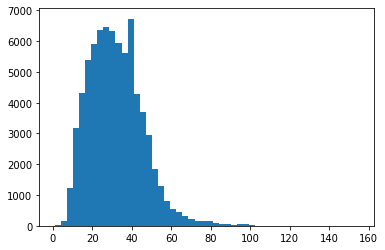

In [14]:
review_data = train_df['사람문장1']
print('리뷰의 최대 길이 : ', max(len(x) for x in review_data))
print('리뷰의 최소 길이 : ', min(len(x) for x in review_data))
print('리뷰 : ', [x for x in review_data if len(x) == 1])
print('리뷰의 평균 : ', sum(len(x) for x in review_data) / len(review_data))
plt.hist([len(x) for x in review_data], bins = 50)

In [15]:
train_df['사람문장2'].map(str)

0                         오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.
1               응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.
2                         딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.
3            젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.
4                                           정말이지 막막해.
                             ...                     
74851                             있는 돈으로 병원비를 지원을 할래.
74852         낙하산으로 들어가고 하니까. 우리 집은 가난해서 그런 거 보면 부러워.
74853    나는 나이만 많을 뿐이고 별다른 질병이 없는데도 거절되다니. 이게 무슨 일이야?
74854         집사람은 경력단절 된 지 오래이고 애들은 졸업하고도 손 벌리고만 있어.
74855                  내 공부 도와주는 선생님이 외국이로 가신데. 큰일이야.
Name: 사람문장2, Length: 74856, dtype: object

1. 각 문장마다 어떤 정확도를 보이는 지 확인해보기

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re


x_data = train_df['사람문장1']
y_data = train_df['label'].values

x_data = x_data.apply(lambda x : re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', " ", x)).values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.2, random_state = 42)

from konlpy.tag import Okt

okt = Okt()
def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

print(okt.morphs(x_train[4]))

['엄마', '가', '자꾸', '내', '가', '화장', '하는', '것', '에', '대해', '뭐라고', '해', '완전', '짜증나']


In [17]:
def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [ ]:
import os
from scipy.sparse import save_npz, load_npz
from sklearn.feature_extraction.text import TfidfVectorizer

def transform_data(x_train, x_test):
  if not os.path.isfile('okt_train.npz'):
    tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
    tfidf.fit(x_train)
    x_train_okt = tfidf.transform(x_train)
    x_test_okt = tfidf.transform(x_test)
    save_npz('okt_train.npz', x_train_okt)
    save_npz('okt_test.npz', x_test_okt)
  else:
    x_train_okt = load_npz('okt_train.npz')
    x_test_okt = load_npz('okt_test.npz')

    return x_train_okt, x_test_okt

In [18]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def light_gbm_train(x_train_okt, x_test_okt, y_train, y_test):
  lgbm_clf = LGBMClassifier(n_estimators = 400, n_jobs = -1, verbose = 1)
  lgbm_clf.fit(x_train_okt, y_train)
  preds = lgbm_clf.predict(x_test_okt)
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("LGBM Classifier\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def LogisticRegression_train(x_train_okt, x_test_okt, y_train, y_test):
  clf = LogisticRegression(max_iter = 1000, random_state = 0)
  clf.fit(x_train_okt, y_train)
  preds = clf.predict(x_test_okt)
  print('LogisticRegression accuracy score : ', accuracy_score(y_test, preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("LGBM Classifier\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1)) 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

def LogisticRegression_liblinear(x_train_okt, x_test_okt, y_train, y_test):
  clf = LogisticRegression(max_iter = 1000, random_state = 0, solver = "liblinear", C = 3)
  clf.fit(x_train_okt, y_train)
  preds = clf.predict(x_test_okt)
  print('LogisticRegression_liblinear accuracy score : ', accuracy_score(y_test,  preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("LGBM Classifier\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def Logistic_with_CountVectorizer(x_data, y_data):
  count_vec = CountVectorizer(tokenizer = okt.morphs)
  x_train_data = count_vec.fit_transform(x_data)
  x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_data, test_size = 0.25, random_state = 156)
  clf = LogisticRegression(max_iter = 1000, solver = 'liblinear',)
  clf.fit(x_train, y_train)
  preds = clf.predict(x_test)
  print('Logistic with CountVectorizer accuracy score : ', accuracy_score(y_test, preds))
  confusion = confusion_matrix(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds, average='weighted')
  recall = recall_score(y_test, preds, average='weighted')
  f1 = f1_score(y_test, preds, average='weighted')

  print("LGBM Classifier\n")
  print(confusion)
  print('정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nf1: {3:.4f}'
        .format(accuracy,precision,recall,f1))

In [ ]:
from konlpy.tag import Okt
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

column_name = ['사람문장1', '시스템응답1', '사람문장2', '시스템응답2', '사람문장3', '시스템응답3']
for column in column_name:
  
  x_data = train_df[column]
  y_data = train_df['label'].values

  x_data = x_data.apply(lambda x : re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', " ", str(x))).values
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.25, random_state = 42)
  tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
  tfidf.fit(x_train)
  x_train_okt = tfidf.transform(x_train)
  x_test_okt = tfidf.transform(x_test)

  print('===================' + column + ' 열의 모델 정확도=================')
  #light_gbm_train(x_train_okt, x_test_okt, y_train, y_test)
  #LogisticRegression_train(x_train_okt, x_test_okt, y_train, y_test)
  #LogisticRegression_liblinear(x_train_okt, x_test_okt, y_train, y_test)
  #Logistic_with_CountVectorizer(x_data, y_data)

===================사람문장1 열의 모델 정확도=================
accuracy score :  0.7022015603291654
LogisticRegression accuracy score :  0.7142246446510634
LogisticRegression_liblinear accuracy score :  0.7158811584909693
Logistic with CountVectorizer accuracy score :  0.715453671048413
===================시스템응답1 열의 모델 정확도=================
accuracy score :  0.6467350646574757
LogisticRegression accuracy score :  0.6567810195575505
LogisticRegression_liblinear accuracy score :  0.6596131238644865
Logistic with CountVectorizer accuracy score :  0.6641551779416479
===================사람문장2 열의 모델 정확도=================
accuracy score :  0.610612375761462
LogisticRegression accuracy score :  0.6184140215881159
LogisticRegression_liblinear accuracy score :  0.6194827401945068
Logistic with CountVectorizer accuracy score :  0.6161162765843753
===================시스템응답2 열의 모델 정확도=================
accuracy score :  0.5881158490969328
LogisticRegression accuracy score :  0.5927113391044138
LogisticRegression_li

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df = 5).fit(x_data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [22]:
import re
train_df['text'] = train_df['사람문장1'] + train_df['시스템응답1'] + train_df['사람문장2'].map(str) + train_df['시스템응답2'] + train_df['사람문장3'] + train_df['시스템응답3']
x_data = train_df['text']

x_data = x_data.apply(lambda x : re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', " ", x)).values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.2, random_state = 42)

from konlpy.tag import Okt

okt = Okt()
def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
tfidf.fit(x_train)
x_train_okt = tfidf.transform(x_train)
x_test_okt = tfidf.transform(x_test)
print('=======text를 다 합치면=======')
light_gbm_train(x_train_okt, x_test_okt, y_train, y_test)
LogisticRegression_train(x_train_okt, x_test_okt, y_train, y_test)
LogisticRegression_liblinear(x_train_okt, x_test_okt, y_train, y_test)
Logistic_with_CountVectorizer(x_data, y_data)

=======text를 다 합치면=======
LGBM Classifier

[[2156  249   85]
 [ 109 6258  872]
 [  81 1483 3679]]
정확도: 0.8077
정밀도: 0.8094
재현율: 0.8077
f1: 0.8065
LogisticRegression accuracy score :  0.7986240983168581
LGBM Classifier

[[2056  320  114]
 [  71 6242  926]
 [  74 1510 3659]]
정확도: 0.7986
정밀도: 0.8019
재현율: 0.7986
f1: 0.7978
LogisticRegression_liblinear accuracy score :  0.8037002404488378
LGBM Classifier

[[2142  244  104]
 [  89 6189  961]
 [  81 1460 3702]]
정확도: 0.8037
정밀도: 0.8052
재현율: 0.8037
f1: 0.8029
Logistic with CountVectorizer accuracy score :  0.7868975098856471
LGBM Classifier

[[2661  282  148]
 [ 167 7390 1471]
 [  96 1824 4675]]
정확도: 0.7869
정밀도: 0.7875
재현율: 0.7869
f1: 0.7867


In [ ]:
if not os.path.isfile('okt_train.npz'):
  tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3, max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)
  tfidf.fit(x_train)
  x_train_okt = tfidf.transform(x_train)
  x_test_okt = tfidf.transform(x_test)
  save_npz('okt_train.npz', x_train_okt)
  save_npz('okt_test.npz', x_test_okt)
else:
  x_train_okt = load_npz('okt_train.npz')
  x_test_okt = load_npz('okt_test.npz')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(max_iter = 1000, random_state = 0)
params = {'C' : [0.01, 0.1, 0.5,  1, 5, 10]}
grid_cv = GridSearchCV(clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv.fit(x_train_okt, y_train)

print(grid_cv.best_params_, grid_cv.best_score_)

In [ ]:
count_vec.vocabulary_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.utils.fixes import loguniform

sgd = SGDClassifier(loss = 'log', random_state = 42)
param_dist = {'alpha' : loguniform(0.0001, 100.0)}

rsv_okt = RandomizedSearchCV(estimator = sgd, param_distributions = param_dist,
                             n_iter = 50, random_state = 42, verbose = 1)
rsv_okt.fit(x_train_okt, y_train)

In [ ]:
print(rsv_okt.best_score_)
print(rsv_okt.best_params_)